In [1]:
from IPython.display import display, clear_output
import pandas as pd
import matplotlib.pyplot as plt


predictions_df = pd.read_csv("predictions.csv")
predictions_df

,img_path,pred_x,pred_y,true_x,true_y,distance
0,Dataset/1755730136202.jpg,0.409354,0.807092,0.268171,0.068642,0.751825
1,Dataset/1755730143359.jpg,0.522818,0.764496,0.868819,0.117660,0.733562
2,Dataset/1755730153333.jpg,0.346369,0.231081,0.473656,0.872536,0.653963
3,Dataset/1755730153584.jpg,0.423971,0.153725,0.513172,0.799009,0.651420
4,Dataset/1755730153078.jpg,0.254031,0.332956,0.434139,0.946063,0.639015
...,...,...,...,...,...,...
5399,Dataset/1755730499807.jpg,0.260308,0.061091,0.260959,0.056652,0.004486
5400,Dataset/1755731270846.jpg,0.188531,0.634116,0.185701,0.636795,0.003897
5401,Dataset/1757528173492.jpg,0.529424,0.205730,0.532752,0.204003,0.003750
5402,Dataset/1755731254494.jpg,0.561556,0.606577,0.562380,0.609436,0.002975


In [2]:
def display_image_with_preds(idx):
    row = predictions_df.iloc[idx]
    img_path = row['img_path']
    pred_x, pred_y = row['pred_x'], row['pred_y']
    true_x, true_y = row['true_x'], row['true_y']

    fig, axs = plt.subplots(1, 2, figsize=(10, 5))

    # Show image on the left
    img = plt.imread(img_path)
    axs[0].imshow(img)
    axs[0].set_title(f"Image: {img_path.split('/')[-1]}")
    axs[0].axis('off')

    # Show prediction and ground truth on the right
    axs[1].plot(1 - pred_x, 1 - pred_y, 'ro', label='Prediction', markersize=10)
    axs[1].plot(1 - true_x, 1 - true_y, 'go', label='Ground Truth', markersize=10)
    axs[1].set_xlim(0, 1)
    axs[1].set_ylim(0, 1)
    axs[1].set_aspect('equal', adjustable='box')
    axs[1].set_xticks([0, 1])
    axs[1].set_yticks([0, 1])
    axs[1].set_title(f"Pred (red): ({pred_x:.2f}, {pred_y:.2f})\nTrue (green): ({true_x:.2f}, {true_y:.2f})")
    axs[1].legend()

    plt.tight_layout()
    plt.show()

    return img_path

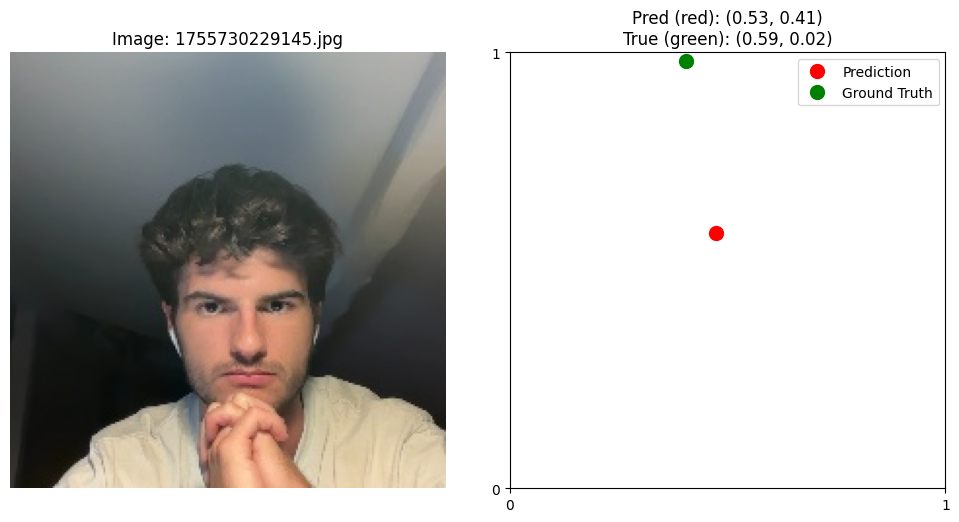

In [3]:
images_to_delete = []

idx = 0
while True:
    img_path = display_image_with_preds(idx)

    choice = input("d (delete) / s (skip) / q (quit)")
    if choice == "d":
        images_to_delete.append(img_path)
    elif choice == "q":
        break

    idx += 1
    
    # Nettoyer l'affichage précédent
    clear_output(wait=True)

In [4]:
print('images_to_delete', images_to_delete)

images_to_delete ['Dataset/1755730143359.jpg', 'Dataset/1755731939207.jpg', 'Dataset/1755731315431.jpg', 'Dataset/1755730150775.jpg', 'Dataset/1755777761366.jpg', 'Dataset/1755731931757.jpg', 'Dataset/1755731888219.jpg', 'Dataset/1755777754971.jpg', 'Dataset/1755730851506.jpg', 'Dataset/1757583641523.jpg', 'Dataset/1755730151031.jpg', 'Dataset/1755730156916.jpg', 'Dataset/1757518929742.jpg', 'Dataset/1755730150513.jpg', 'Dataset/1755730913005.jpg', 'Dataset/1755730236818.jpg', 'Dataset/1755730208404.jpg', 'Dataset/1755731910238.jpg', 'Dataset/1757583656596.jpg', 'Dataset/1755777825604.jpg', 'Dataset/1755881717391.jpg', 'Dataset/1755731290602.jpg', 'Dataset/1755730196358.jpg', 'Dataset/1755881698693.jpg', 'Dataset/1757583651738.jpg', 'Dataset/1755730145159.jpg']


In [5]:
dataset_df = pd.read_csv('dataset.csv')
print('Length of dataset_df', len(dataset_df))

dataset_df[dataset_df['img_filename'].isin(images_to_delete)]
filtered_dataset_df = dataset_df[~dataset_df['img_filename'].isin(images_to_delete)]

filtered_dataset_df.to_csv('dataset_fixed.csv', index=False)
print('Length of filtered_dataset_df', len(filtered_dataset_df))


Length of dataset_df 5404
Length of filtered_dataset_df 5378
